In [112]:
####################################################################
### lOADING LIBRARIES AND IMPORTING NECESSARY MODULES AND MODELS ###
####################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [115]:
########################
### READING THE DATA ###
########################
house_df = pd.read_csv("/Users/saiffallah.GREENTNS/Desktop/Formation\AI\GOMYCODE\Dataset/kc_house_data.csv",sep=',')

In [116]:
#######################################
### VIEWING A PART OF THE DATAFRAME ###
#######################################
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900",3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,48,-122,1340,5650
1,6414100192,20141209T000000,"538,000",3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,48,-122,1690,7639
2,5631500400,20150225T000000,"180,000",2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,48,-122,2720,8062
3,2487200875,20141209T000000,"604,000",4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,48,-122,1360,5000
4,1954400510,20150218T000000,"510,000",3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,48,-122,1800,7503


In [117]:
######################################
### FINDING THE SHAPE OF DATAFRAME ###
######################################
house_df.shape

(21613, 21)

In [118]:
########################################
### CHECK FOR NULLS IN THE DATAFRAME ###
########################################
house_df.isnull().sum() 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [119]:
##################################
### DELETE UNNECESSARY COLUMNS ###
##################################
house_df=house_df.drop(["id"],axis=1)


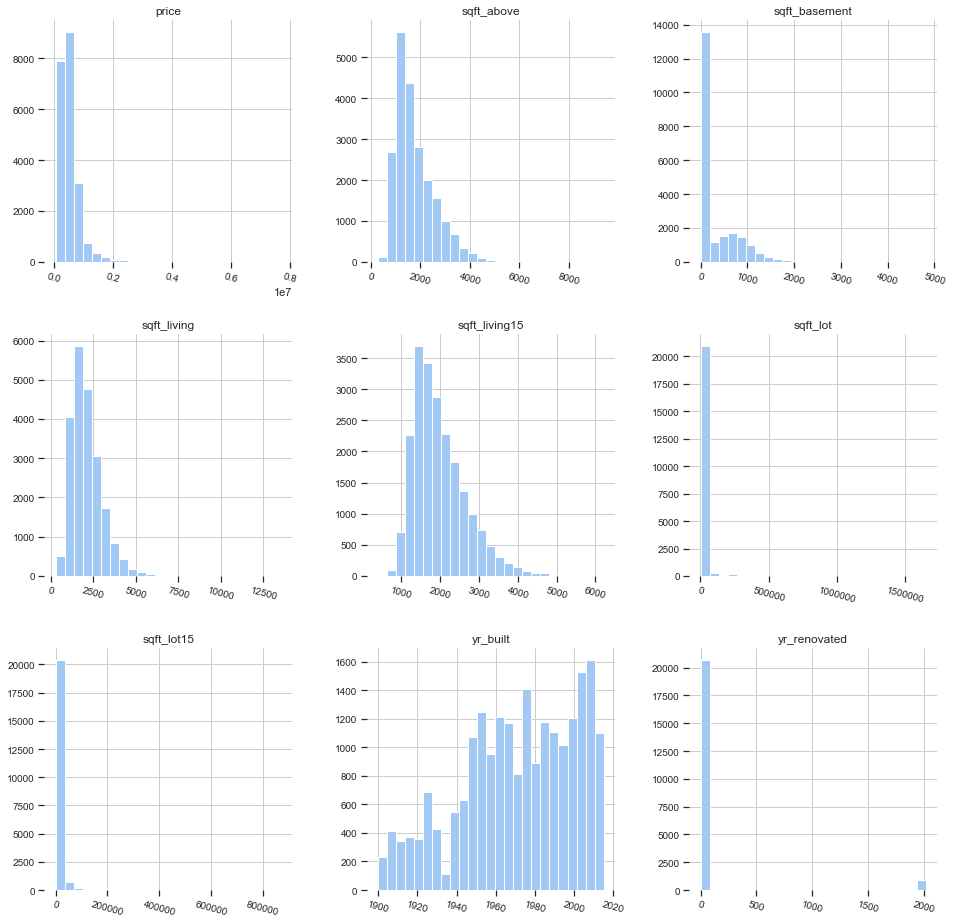

In [182]:
df1=house_df[['price', 'sqft_living', 'sqft_basement','sqft_lot', 'sqft_above',  'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

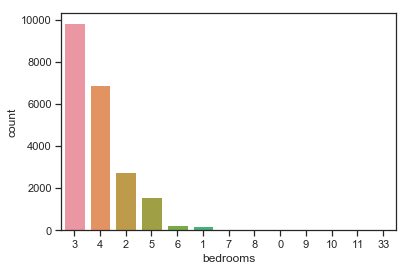

In [173]:
sns.countplot(house_df.bedrooms, order = house_df['bedrooms'].value_counts().index)

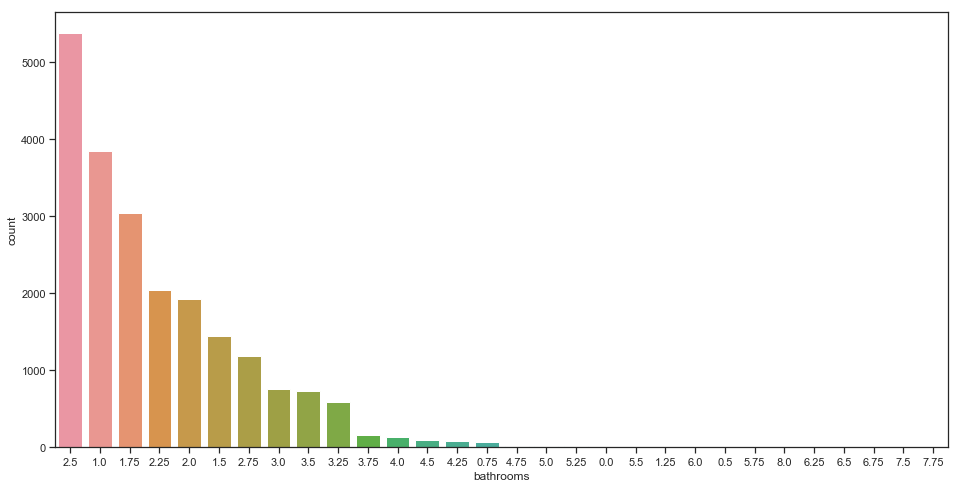

In [183]:
plt.figure(figsize=(16,8))
sns.countplot(house_df.bathrooms, order = house_df['bathrooms'].value_counts().index)

Text(0.5, 1.0, 'Grade Bar Plot')

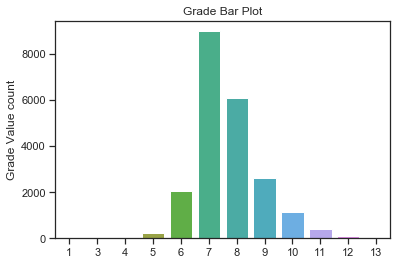

In [177]:
#
# Grade Bar Plot
sns.countplot(x="grade", data=house_df)
plt.ylabel("Grade Value count")
plt.xlabel(" ")
plt.title("Grade Bar Plot")

Text(0.5, 1.0, 'Condition of a house Bar Plot')

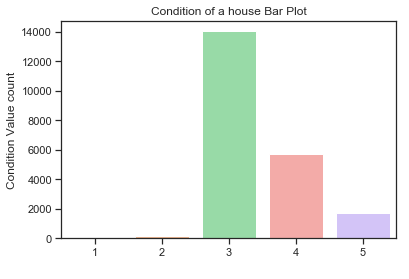

In [178]:
#
# Condition of a house Bar Plot
sns.countplot(x="condition", data=house_df)
plt.ylabel("Condition Value count")
plt.xlabel(" ")
plt.title("Condition of a house Bar Plot")

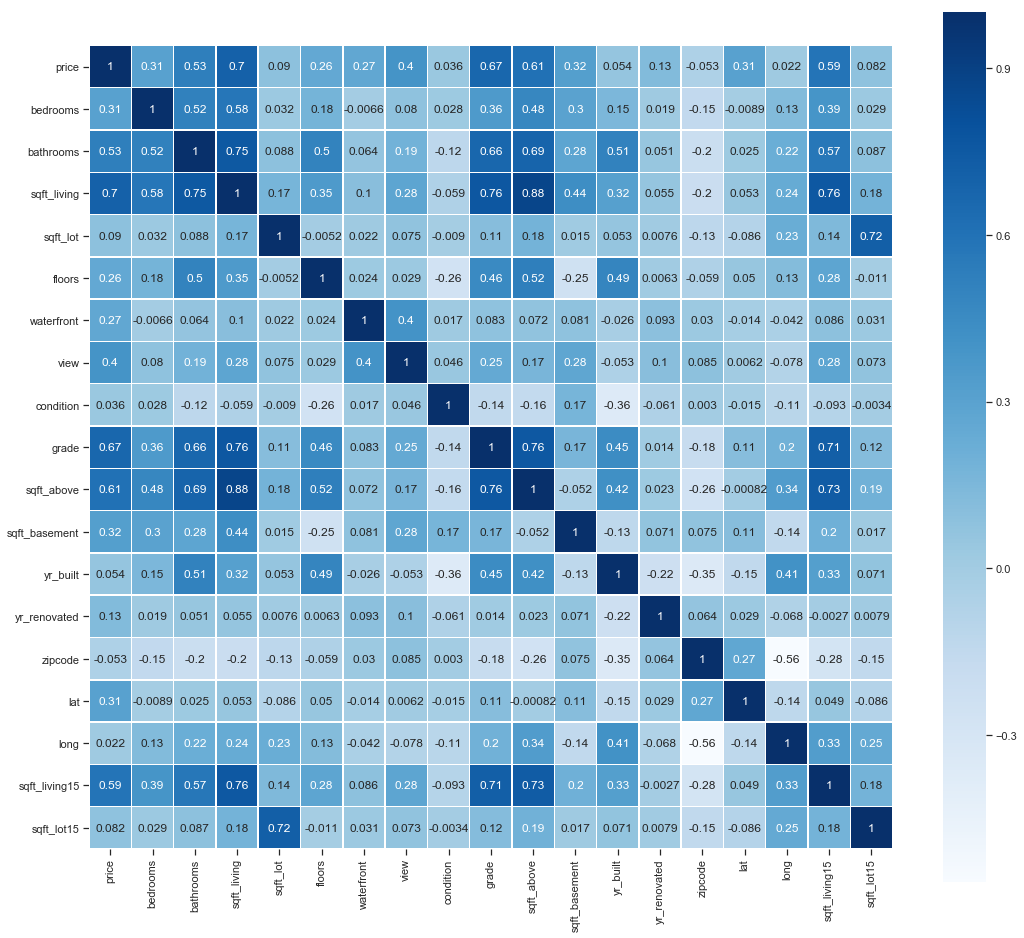

In [120]:
####################################################
### check for any correlations between variables ###
####################################################
corr = house_df.corr()
plt.figure(figsize=(18,16))
sns.heatmap(corr,cmap="Blues",annot=True, square=True,linewidths=.5)

# I remark the price is highly positive correlated with sqft_living, and moderatly  # positive correlated with grade, sqft_above,
# sqft_living15, bathrooms

In [121]:
##############################################
### conevrting data column into float type ###
##############################################
pd.options.display.float_format = '{:,.0f}'.format
house_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,"221,900",3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,48,-122,1340,5650
1,20141209T000000,"538,000",3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,48,-122,1690,7639
2,20150225T000000,"180,000",2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,48,-122,2720,8062
3,20141209T000000,"604,000",4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,48,-122,1360,5000
4,20150218T000000,"510,000",3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,48,-122,1800,7503
5,20140512T000000,"1,225,000",4,4,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,48,-122,4760,101930
6,20140627T000000,"257,500",3,2,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47,-122,2238,6819
7,20150115T000000,"291,850",3,2,1060,9711,1,0,0,3,7,1060,0,1963,0,98198,47,-122,1650,9711
8,20150415T000000,"229,500",3,1,1780,7470,1,0,0,3,7,1050,730,1960,0,98146,48,-122,1780,8113
9,20150312T000000,"323,000",3,2,1890,6560,2,0,0,3,7,1890,0,2003,0,98038,47,-122,2390,7570


In [122]:
house_df[["price","bedrooms","bathrooms","sqft_living","sqft_lot","sqft_above","yr_built","sqft_living15","sqft_lot15"]].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15
count,"21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613","21,613"
mean,"540,088",3,2,"2,080","15,107","1,788","1,971","1,987","12,768"
std,"367,127",1,1,918,"41,421",828,29,685,"27,304"
min,"75,000",0,0,290,520,290,"1,900",399,651
25%,"321,950",3,2,"1,427","5,040","1,190","1,951","1,490","5,100"
50%,"450,000",3,2,"1,910","7,618","1,560","1,975","1,840","7,620"
75%,"645,000",4,2,"2,550","10,688","2,210","1,997","2,360","10,083"
max,"7,700,000",33,8,"13,540","1,651,359","9,410","2,015","6,210","871,200"


<Figure size 576x360 with 0 Axes>

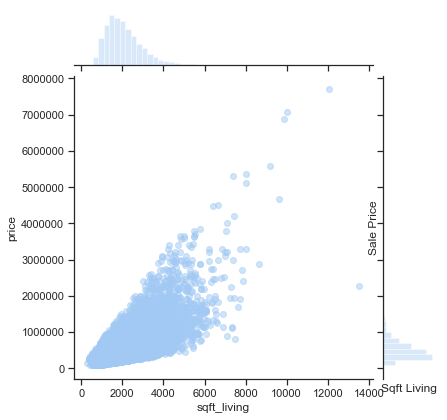

In [123]:
plt.figure(figsize = (8, 5))
sns.jointplot(house_df.sqft_living, house_df.price,
              alpha = 0.5)
plt.xlabel('Sqft Living')
plt.ylabel('Sale Price')
plt.show()

<Figure size 576x360 with 0 Axes>

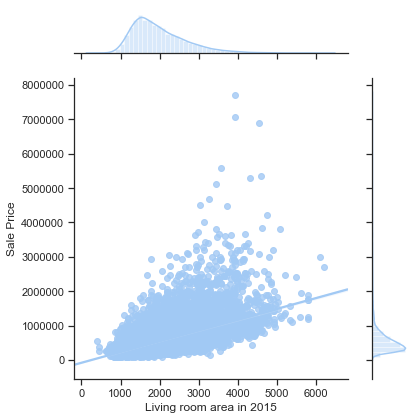

In [124]:
plt.figure(figsize = (8, 5))
X = house_df.sqft_living15
y = house_df.price
ax = sns.jointplot(X, y, kind='reg' )
ax.set_axis_labels(xlabel='Living room area in 2015', ylabel='Sale Price')
plt.tight_layout()
plt.show()

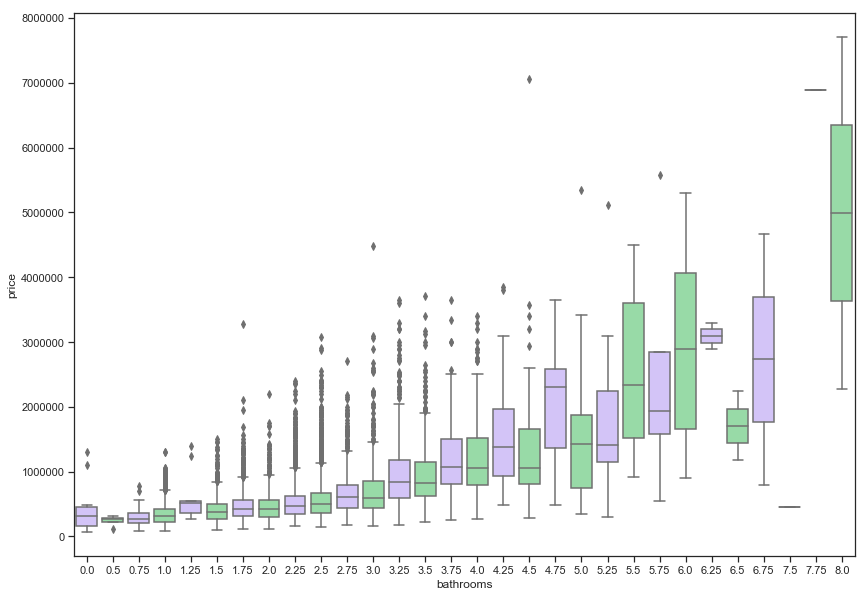

In [196]:
#################################################
### PLOT BOXPLOT GRAPH FOR BATHROOMS AND PRICE ###
#################################################
sns.set(style='ticks',palette='pastel')
fig, ax = plt.subplots(figsize=(14,10)) 
sns.boxplot(x='bathrooms',y='price',palette=["m", "g"], data=house_df,ax=ax)

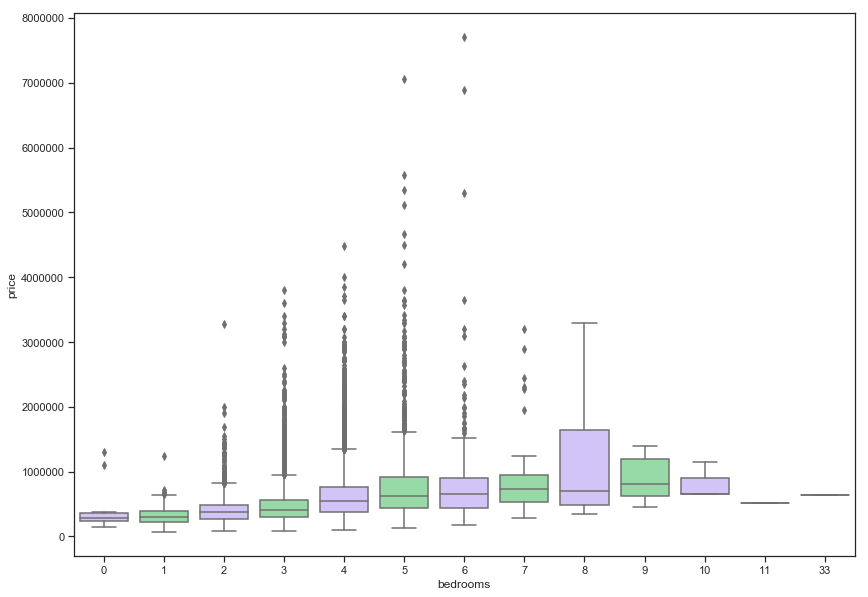

In [127]:
#################################################
### PLOT BOXPLOT GRAPH FOR BEDROOMS AND PRICE ###
#################################################
sns.set(style='ticks',palette='pastel')
fig, ax = plt.subplots(figsize=(14,10)) 
sns.boxplot(x='bedrooms',y='price',palette=["m", "g"], data=house_df,ax=ax)

## LINEAR REGRESSION PROCESS

In [129]:
################################################################
### Learn a link between feature "bedrooms" & output "price" ###
### We create X and y and find their values.                 ###
################################################################
x=house_df[['bedrooms']].values
y=house_df['price'].values
#
# Splitting the data into Train and Test
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)
#
#Fitting simple linear regression to the Training Set
LinReg=LinearRegression()
LinReg.fit(X_train,y_train)
#
#Predicting the prices
predicted=LinReg.predict(X_test)
#
# The Coefficients
print('Coefficients: \n', LinReg.coef_)

#
#Calculate The mean squared error "MSE"
print("MSE : {:.2f}".format(mean_squared_error(y_test,predicted)))
#
# Calculate R-squared 
print("R squared : {:.2f}".format(metrics.r2_score(y_test,predicted)))

Coefficients: 
 [121054.87265313]
MSE : 112502843439.77
R squared : 0.10


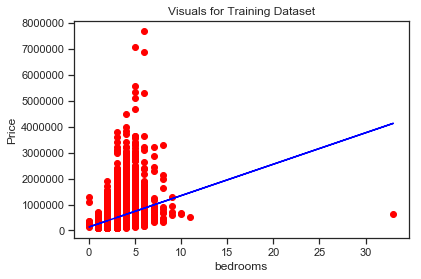

In [130]:
#Visualizing the training Test Results 
plt.scatter(X_train, y_train, color= 'red')
plt.plot(X_train, LinReg.predict(X_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("bedrooms")
plt.ylabel("Price")
plt.show()

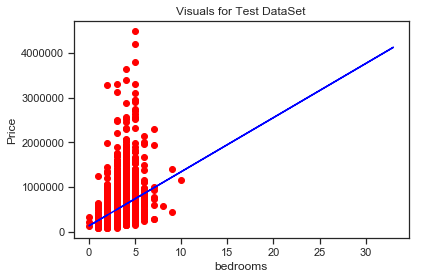

In [131]:
#Visualizing the Test Results 
plt.scatter(X_test, y_test, color= 'red')
plt.plot(X_train, LinReg.predict(X_train), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("bedrooms")
plt.ylabel("Price")
plt.show()

In [132]:
###################################################################
### Learn a link between feature "sqft_living" & output "price" ###
### We create X and y and find their values.                    ###
###################################################################
x=house_df[['sqft_living']].values
y=house_df['price'].values
#
# Splitting the data into Train and Test
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)
#
#Fitting simple linear regression to the Training Set
LinReg=LinearRegression()
LinReg.fit(X_train,y_train)
#
#Predicting the prices
predicted=LinReg.predict(X_test)
#
# The Coefficients
print('Coefficients: \n', LinReg.coef_)
#
#Calculate MSE
print("MSE : {:.2f}".format(mean_squared_error(y_test,predicted)))
#
# Calculate R-squared 
print("R squared : {:.2f}".format(metrics.r2_score(y_test,predicted)))

Coefficients: 
 [282.53959684]
MSE : 64179676631.68
R squared : 0.49


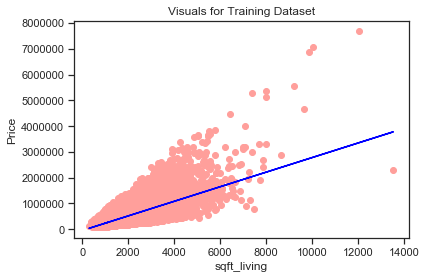

In [133]:
#Visualizing the training Test Results 
plt.scatter(X_train, y_train, color= 'r')
plt.plot(X_train, LinReg.predict(X_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.show()

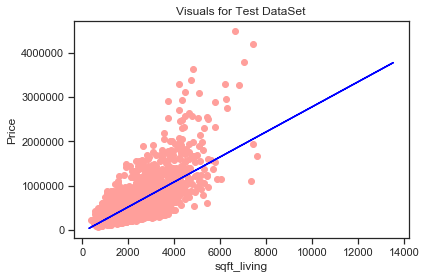

In [134]:
#Visualizing the Test Results 
plt.scatter(X_test, y_test, color= 'r')
plt.plot(X_train, LinReg.predict(X_train), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.show()

## MULTI-LINEAR REGRESSION

In [141]:
########################################################################################################################
### Learn the link between vector of features "sqft_living,grade, sqft_above, sqft_living15, bathrooms, sqft_basement, ###
### yr_built, bedrooms" & output "price"                                                                             ###
### We create X and y and find their values.                                                                         ###
########################################################################################################################
x=house_df[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','sqft_basement','yr_built','bedrooms']].values
y=house_df['price'].values
#
# Splitting the data into Train and Test
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)
#
#Fitting simple linear regression to the Training Set
LinReg=LinearRegression()
LinReg.fit(X_train,y_train)
#
#Predicting the prices
predicted = LinReg.predict(X_test)
predicted_train = LinReg.predict(X_train)
#
# The Coefficients
print('Coefficients: \n', LinReg.coef_)
#
#Calculate MSE
print("MSE_test : {:.2f}".format(mean_squared_error(y_test,predicted)))
print("MSE_train : {:.2f}".format(mean_squared_error(y_train,predicted_train)))
#
# Calculate R-squared 
print("R squared value for test: {:.2f}".format(metrics.r2_score(y_test,predicted)))
print("R squared value for train: {:.2f}".format(metrics.r2_score(y_train,predicted_train)))

Coefficients: 
 [ 3.29199929e+15  1.26044793e+05 -3.29199929e+15  3.42671580e+01
  6.08739695e+04 -3.29199929e+15 -4.09187913e+03 -4.68527478e+04]
MSE_test : 48472112153.00
MSE_train : 52551549129.90
R squared value for test: 0.61
R squared value for train: 0.62


MSE_train : 37154325801.85
R squared value for train : 0.73


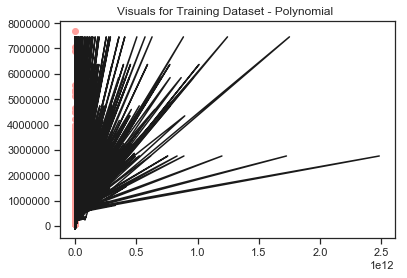

In [171]:
#############################
### Polynomial Regression ###
#############################
PolReg=LinearRegression()
poly=PolynomialFeatures(degree=3)
#
#Transforming Input Variable
X_train_fit = poly.fit_transform(X_train)
#
#Fitting polynomial regression to the Training Set
PolReg.fit(X_train_fit,y_train)
#
#Predicting the prices
predicted_train = PolReg.predict(X_train_fit)
#
#Calculate MSE
print("MSE_train : {:.2f}".format(mean_squared_error(y_train,predicted_train)))
#
# Calculate R-squared
print("R squared value for train : {:.2f}".format(metrics.r2_score(y_train,predicted_train)))
#
# Visualizing the training Test Results 
plt.scatter(X, y, color= 'r')
plt.plot(X_train_fit, PolReg.predict(X_train_fit), color = 'k')
plt.title ("Visuals for Training Dataset - Polynomial ")
#plt.xlabel("sqft_living")
#plt.ylabel("Price")
plt.show()

In [159]:
#
#Transforming Input Variable
X_test_fit = poly.fit_transform(X_test)
#
#Fitting polynomial regression to the Training Set
PolReg.fit(X_test_fit,y_test)
#
#Predicting the prices
predicted_test = PolReg.predict(X_test_fit)

In [170]:
#
#Calculate MSE
print("MSE_test : {:.2f}".format(mean_squared_error(y_test,predicted_test)))
#
# Calculate R-squared 
print("R squared value for test : {:.2f}".format(metrics.r2_score(y_test,predicted)))

MSE_test : 32637862553.02
R squared value for test : 0.61


Text(0.5, 1.0, 'Visuals for Test Dataset - Polynomial ')

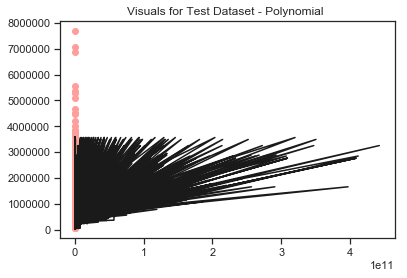

In [172]:
# Visualizing the Polymonial Regression results
plt.scatter(X, y, color= 'r')
plt.plot(X_test_fit, PolReg.predict(X_test_fit), color = 'k')
plt.title ("Visuals for Test Dataset - Polynomial ")